In [4]:
# Unsupervised Learning

#     Clustering algorithms may be classified as listed below:

#      Exclusive Clustering
#      Overlapping Clustering
#      Hierarchical Clustering
#      Probabilistic Clustering

# clustering algorithms:

# K-means
# Fuzzy K-means
# Hierarchical clustering
# Mixture of Gaussians

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("C:/Users/Derya/Downloads/Data.csv")

In [5]:
df.index = df.iloc[:,0]

In [6]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [7]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [8]:
df = df.iloc[:,1:5]

In [9]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [10]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

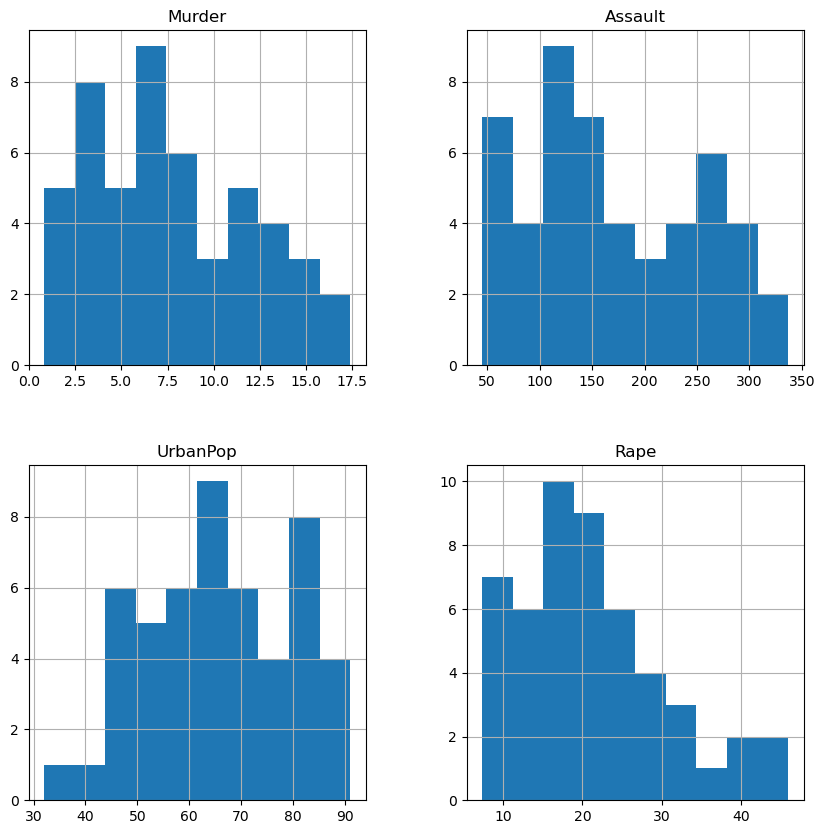

In [12]:
df.hist(figsize = (10,10))

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)

In [14]:
k_fit = kmeans.fit(df)

In [15]:
k_fit.n_clusters

4

In [16]:
k_fit.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [17]:
k_fit.labels_

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2])

In [18]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [19]:
sets = k_fit.labels_

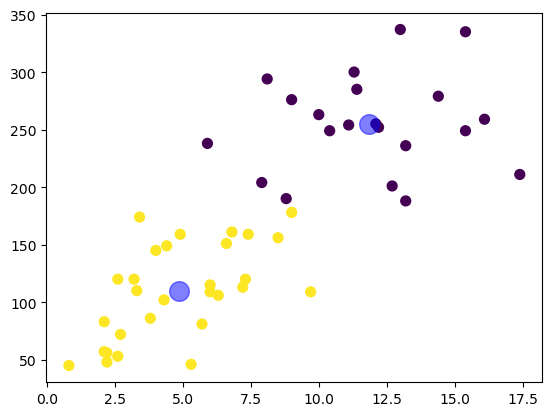

In [22]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = sets, s = 50, cmap = "viridis")

centers = k_fit.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = "blue", s = 200, alpha = 0.5);

In [65]:


from mpl_toolkits.mplot3d import Axes3D

In [66]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
sets = k_fit.labels_
centers = kmeans.cluster_centers_

In [67]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2])

<Figure size 1600x900 with 0 Axes>

In [68]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=sets)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

<Figure size 1600x900 with 0 Axes>

In [69]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [70]:
pd.DataFrame({"States" : df.index, "Sets": sets})[:10]

,States,Sets
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [71]:
df["Set_no"] = sets

In [72]:
df["Set_no"] = df["Set_no"] + 1

In [73]:
df

,Murder,Assault,UrbanPop,Rape,Set_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0
Set_no,50.0,1.880,0.824126,1.0,1.000,2.00,3.000,3.0


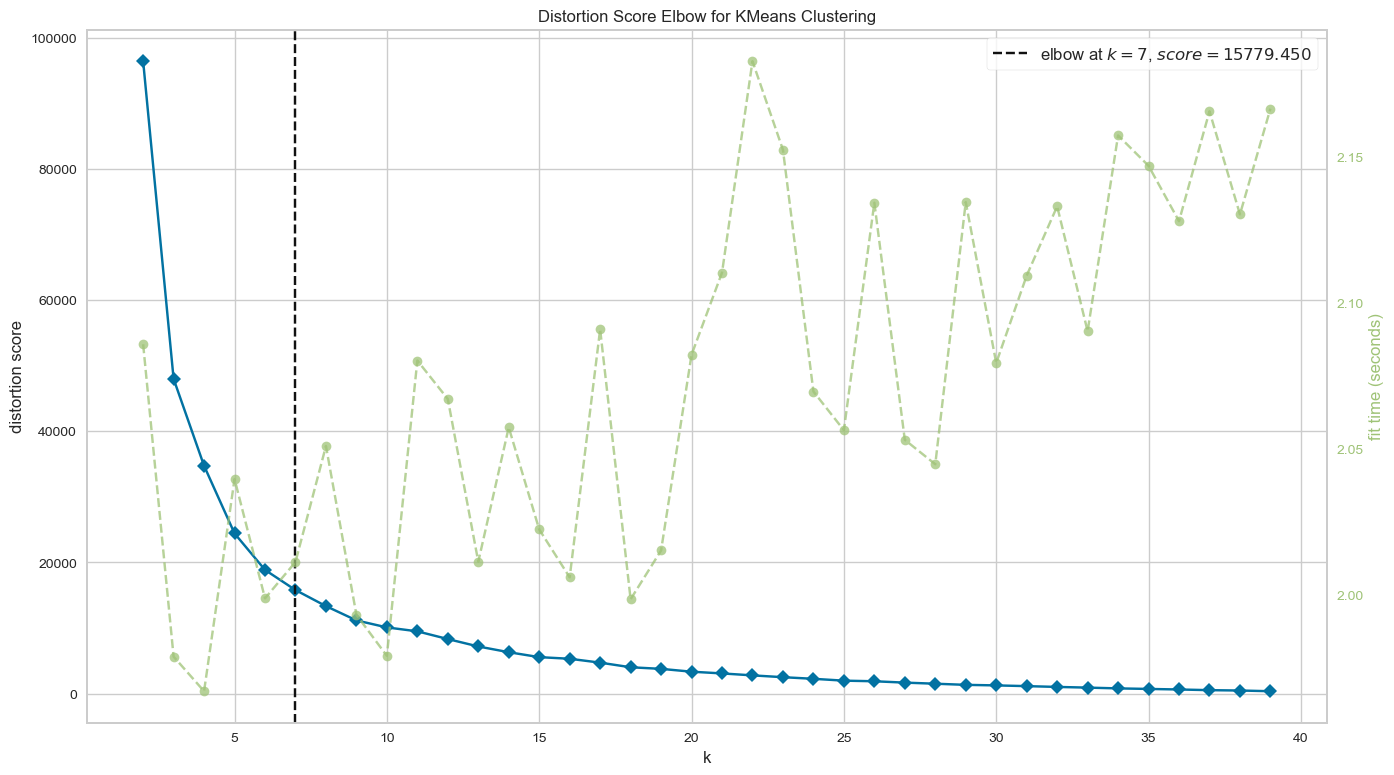

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,40))
visualizer.fit(df) 
visualizer.poof() 

In [95]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [77]:
pd.DataFrame({"States" : df.index, "Sets": sets})[:10]

,States,Sets
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [78]:
#  Hierarchical clustering

In [79]:
df = pd.read_csv("C:/Users/Derya/Downloads/Data.csv")
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]

In [80]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [82]:
# dir(hc_complete)

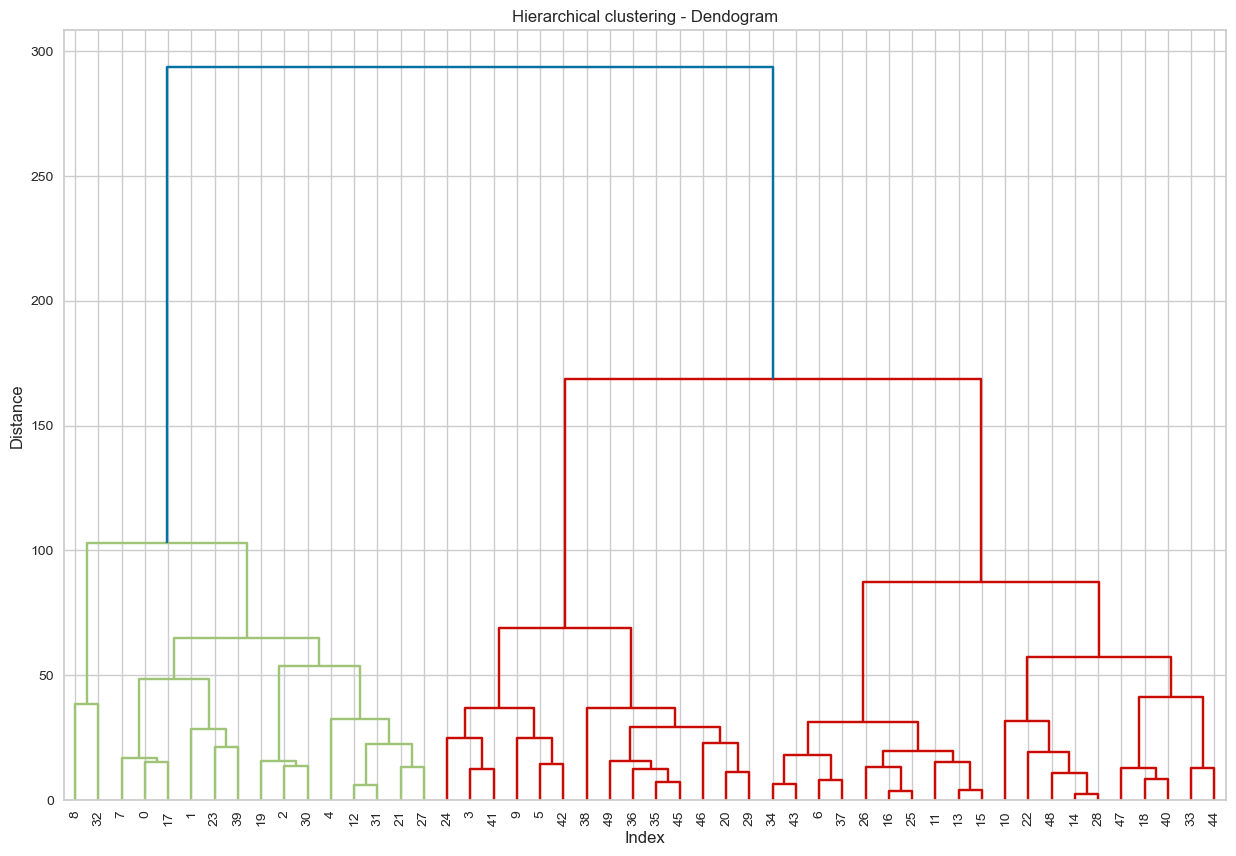

In [110]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical clustering - Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(hc_complete, leaf_font_size=10);

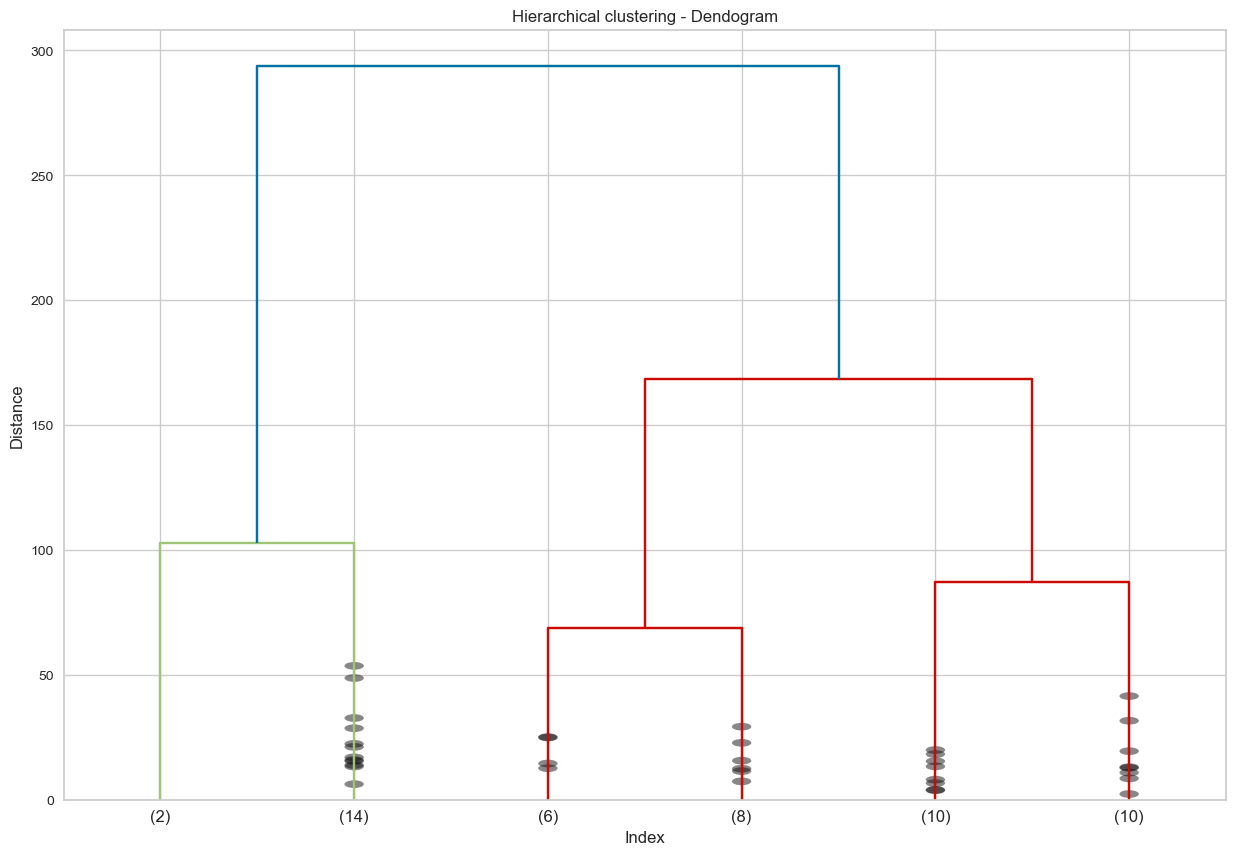

In [119]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical clustering - Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 6,
    show_contracted = True
);

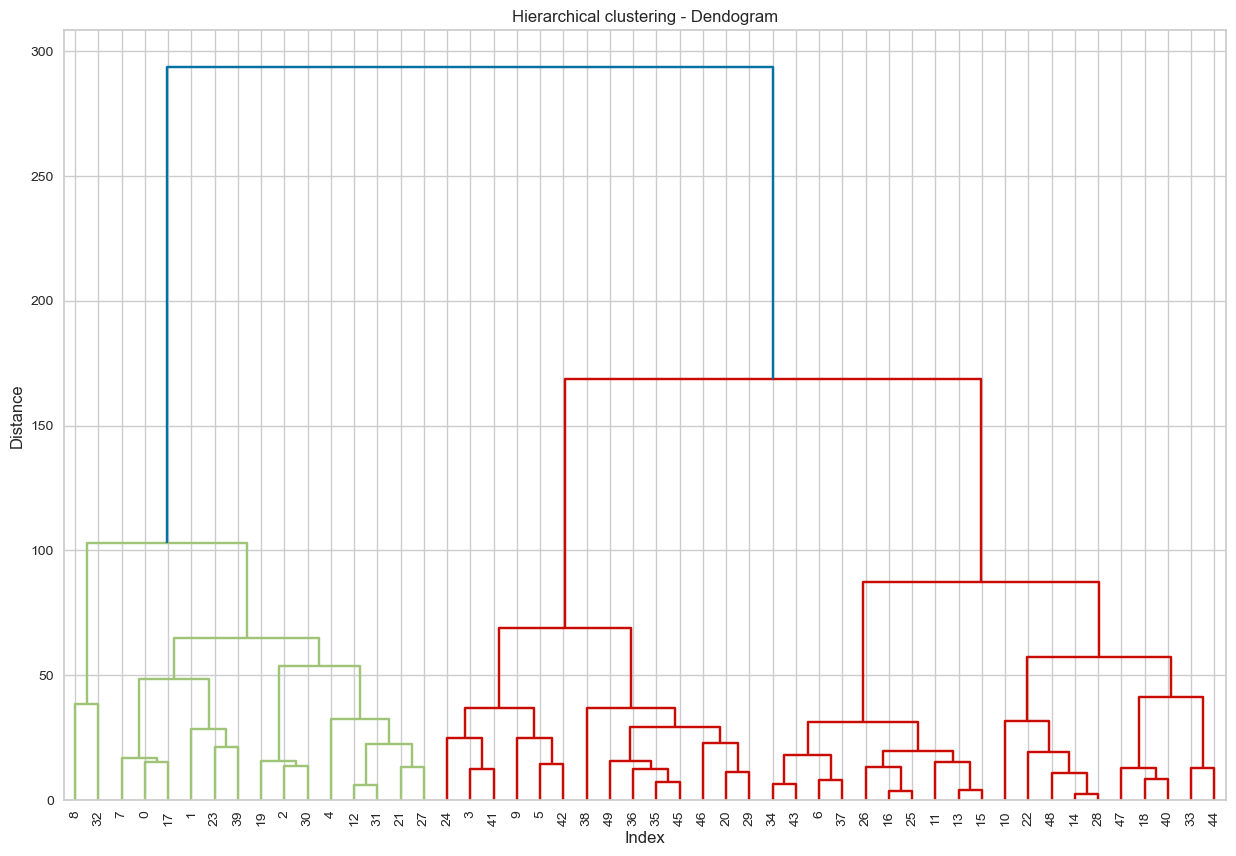

In [86]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical clustering - Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
)

In [87]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [88]:
pd.DataFrame({"States" : df.index, "Sets": cluster.fit_predict(df)})[:10]

,States,Sets
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [89]:
df["set_no"] = cluster.fit_predict(df)

In [91]:
df.head()

,Murder,Assault,UrbanPop,Rape,set_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


In [92]:
# PCA   
# PCA is a way of reducing the number of independent variables in a dataset and is particularly applicable
# when the ratio of data points to independent variables is low.
# PCA transforms a linear combination of variables such that the resulting variable expresses
# the maximum variance within the combination of variables.

In [99]:
df = pd.read_csv("C:/Users/Derya/Downloads/Data.csv")
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.head()


,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [100]:
from warnings import filterwarnings
filterwarnings('ignore')

In [101]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [111]:
component_df = pd.DataFrame(data = pca_fit, 
                          columns = ["1.component","2.Component","3.Component"])

In [112]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [113]:
pca = PCA().fit(df)

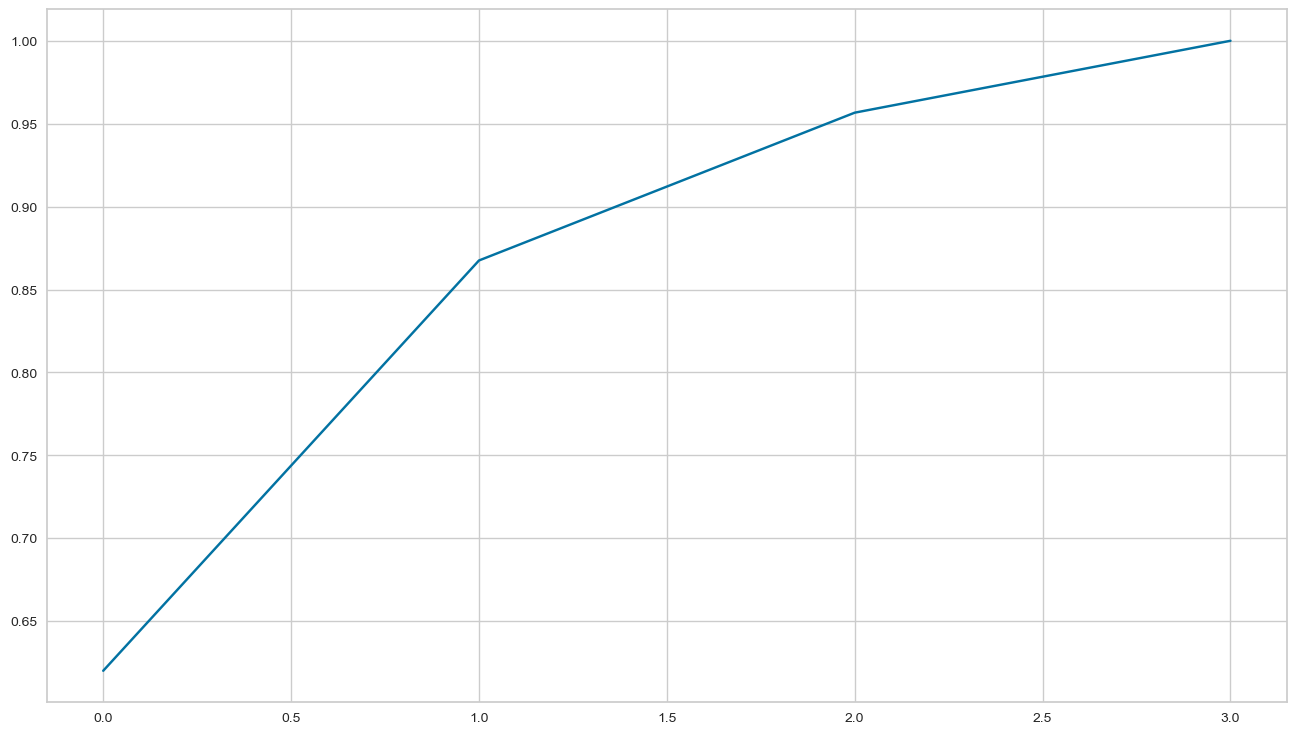

In [109]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))